# For 2D based Velocity De-aliasing based on Louf et al. 2020 (UNRAVEL package) #

In [1]:
import wradlib as wrl
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import unravel
import copy


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
import os
os.chdir("/home/users/sambit15/kochi_dwr/")

In [3]:
file='/home/users/sambit15/kochi_dwr/NETCDF5_kochi_weather_2018_08_01_00_02_03 (1).nc'
data = wrl.io.read_generic_netcdf(file)
data['variables'].keys()

odict_keys(['esStartTime', 'elevationNumber', 'radialAzim', 'radialElev', 'radialTime', 'siteLat', 'siteLon', 'siteAlt', 'firstgateRange', 'gateSize', 'nyquist', 'unambigrange', 'RadarConst', 'beamWidthHori', 'pulseWidth', 'elevationList', 'azimuthSpeed', 'highPRF', 'lowPRF', 'waveLength', 'groundHeight', 'angleResolution', 'sampleNum', 'SQIThresh', 'LOGThresh', 'beamWidthVert', 'Z', 'V', 'W', 'ZDR', 'PHIDP', 'RHOHV'])

In [4]:
print(data['variables']['siteLat']['data'], ',', data['variables']['siteLon']['data'], ',', data['variables']['siteAlt']['data'])
print(data['variables']['elevationNumber']['data'])
print(data['variables']['firstgateRange']['data'])
print(data['variables']['gateSize']['data'])
print(data['variables']['radialElev']['data'].shape)
print(data['variables']['groundHeight']['data'])
print(data['variables']['unambigrange']['data'])
print(data['variables']['elevationList']['data'])
print(data['variables']['highPRF']['data'])
print(data['variables']['lowPRF']['data'])
print(data['variables']['waveLength']['data'])
print(data['variables']['nyquist']['data'])

9.9263 , 76.2622 , 30.0
2
0.0
300.0
(360,)
30.0
500.0
[0. 1.]
300.0
0.0
5.3333335
4.0


In [6]:
radar_lat = data['variables']['siteLat']['data']
radar_lon = data['variables']['siteLon']['data']
radar_alt = data['variables']['siteAlt']['data']
radar_fg = data['variables']['firstgateRange']['data']
radar_gs = data['variables']['gateSize']['data']
radar_ur = data['variables']['unambigrange']['data']
radar_bins = data['dimensions']['bin']['size']

#radar_range = np.arange(0.0,1633*300.0,300.0)
radar_range = np.arange(radar_fg,radar_bins*radar_gs,radar_gs)
radar_azims = np.arange(0.0,360.0)
#radar_location = (76.2622,9.9263,30.0) # Longitude first in the site coords tuple
radar_location = (radar_lon,radar_lat,radar_alt) # Longitude first in the site coords tuple

In [7]:
vel = data['variables']['V']['data']
vel[vel<-999.0] = np.nan

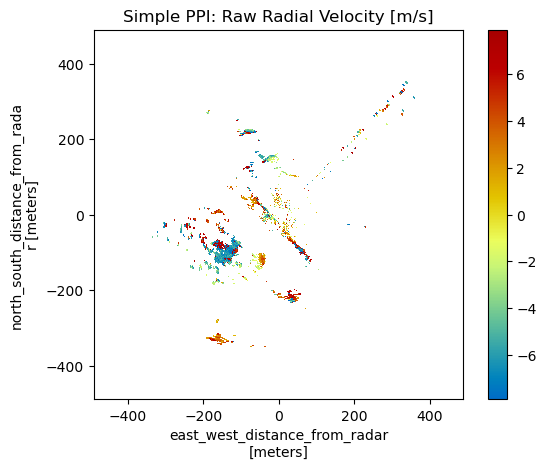

In [18]:
img = wrl.georef.create_xarray_dataarray(vel[0], r=radar_range/1000.0, phi=radar_azims, site=radar_location) 

img = img.wrl.georef.georeference()
pm = img.wrl.vis.plot()
txt = plt.title("Simple PPI: Raw Radial Velocity [m/s]")

In [9]:
vel_data = copy.deepcopy(vel)
nqv = data['variables']['nyquist']['data']

In [16]:
# For first elevation/sweep
# Use the in-built 2D based de-aliasing function in unravel package. Similar to Zhang et al. (2003)
corr_vel, flag = unravel.dealiasing_process_2D(r=radar_range/1000.0, azimuth=radar_azims,elevation=0.0,velocity=vel_data.data[0],nyquist_velocity=nqv.data)

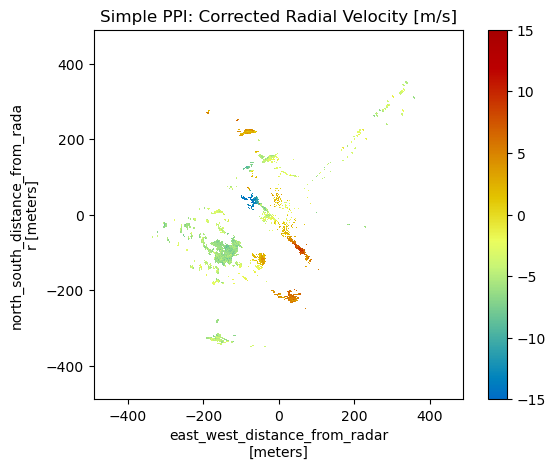

In [17]:
img_corr = wrl.georef.create_xarray_dataarray(corr_vel, r=radar_range/1000.0, phi=radar_azims, site=radar_location) 

img_corr = img_corr.wrl.georef.georeference()
pm = img_corr.wrl.vis.plot()
txt = plt.title("Simple PPI: Corrected Radial Velocity [m/s]")